In [1]:
!python --version

Python 3.7.9


In [15]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
model1_path = r"C:\Users\FAVOUR-UKASOANYA\Desktop\Projects\Photo_Cluster\models\facenet_v1"
model2_path = r"C:\Users\FAVOUR-UKASOANYA\Desktop\Projects\Photo_Cluster\models\facenet_v2"

model1 = tf.keras.models.load_model(model1_path)
model2 = tf.keras.models.load_model(model2_path)

In [11]:
def preprocess_img(image):
    image_file = tf.io.read_file(image)
    image_tensor = tf.image.decode_jpeg(image_file, channels=3)
    image_tensor = tf.image.convert_image_dtype(image_tensor, tf.float32)# / 255.0
    image_tensor = tf.image.resize(image_tensor, (160, 160))
    image_tensor = tf.expand_dims(image_tensor, axis=0)
    return image_tensor

In [12]:
def similarity(vec_1, vec_2):
    dot = tf.reduce_sum(tf.multiply(vec_1, vec_2))
    mag_1 = tf.sqrt(tf.reduce_sum(tf.square(vec_1)))
    mag_2 = tf.sqrt(tf.reduce_sum(tf.square(vec_2)))
    similarity = dot / (mag_1 * mag_2)
    return similarity

In [35]:
def compare_faces(image_path, folder_path, model):
    usr_image = preprocess_img(image_path)
    usr_image_emb = model(usr_image)
    usr_image_name = os.path.basename(image_path)
    sim_scores = {}
    
    for path in sorted(os.listdir(folder_path)):
        full_path = os.path.join(folder_path, path)
        sys_image = preprocess_img(full_path)
        sys_image_name = os.path.basename(path)
        sys_image_emb = model(sys_image)
        sim = similarity(usr_image_emb, sys_image_emb)
        sim_scores[sys_image_name] = sim

    sim_scores_sorted = sorted(sim_scores.items(), key=lambda x: x[1])
    sim_scores = dict(sim_scores_sorted)
    
    for sys_image_name, sim in sim_scores.items():
        print(f"The similarity between images {usr_image_name} and {sys_image_name} is: {sim}")

In [36]:
compare_faces(r"C:\Users\FAVOUR-UKASOANYA\Desktop\Projects\Photo_Cluster\test\cropped\31.jpg",
              r"C:\Users\FAVOUR-UKASOANYA\Desktop\Projects\Photo_Cluster\test\cropped", model1)

The similarity between images 31.jpg and 35.jpg is: -0.13871408998966217
The similarity between images 31.jpg and 133.jpg is: -0.09427188336849213
The similarity between images 31.jpg and 61.jpg is: -0.06701508909463882
The similarity between images 31.jpg and 107.jpg is: -0.0666506290435791
The similarity between images 31.jpg and 113.jpg is: -0.06492853909730911
The similarity between images 31.jpg and 117.jpg is: -0.060303010046482086
The similarity between images 31.jpg and 101.jpg is: -0.0404076986014843
The similarity between images 31.jpg and 165.jpg is: -0.032699957489967346
The similarity between images 31.jpg and 53.jpg is: -0.02951049990952015
The similarity between images 31.jpg and 73.jpg is: -0.020203422755002975
The similarity between images 31.jpg and 163.jpg is: -0.009018871933221817
The similarity between images 31.jpg and 23.jpg is: -0.007555434480309486
The similarity between images 31.jpg and 71.jpg is: -0.0018008992774412036
The similarity between images 31.jpg an

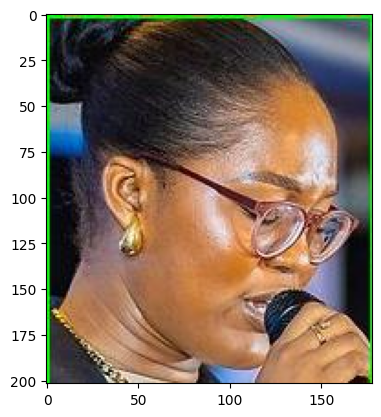

In [28]:
plt.imshow(plt.imread(r"C:\Users\FAVOUR-UKASOANYA\Desktop\Projects\Photo_Cluster\test\cropped\31.jpg"))